In [61]:
# podstawowe biblioteki ktorych uzywamy
# nowe pakiety bedziemy wczytywali w dalszej czesci tego notatnika

from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# funkcja pomocnicza do wizualizacji granicy klas (decision boundary, decision regions)

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # obszar wykresu
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # wykres punktowy obserwacji
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
        plt.legend()

In [63]:
# wczytujemy zbiór danych "Iris". W tym wpadku uzyjemy pakietu "sklearn.datasets"
# funkcja "load_iris()" zwróci nam obiekt który zawiera nasz zbiór danych
# oraz kilka innych użytecznych metod:
# - iris.DESCR - opis zbioru
# - iris.data - surowy zbiór danych - ale tylko zmienne niezależne (obserwacje) i bez nazw kolumn
# - iris.feature_names - nazwy kolumn ("cech") zbioru.
# - iris.target - lista etykiet (jako indeksy: 0, 1, 2...)
# - iris.target_names - nazwy etykiet odpowiadające indeksom ()

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [64]:
# Tutaj mały komentarz: moglibyśmy również wczytać nasz zbiór z pliku CSV,
# który jest np. w repozytorium naszego kursu
# https://raw.githubusercontent.com/mateuszr/ml-course-1/main/datasets/Iris.csv 
# Zbiór jest identyczny i efekt końcowy będzie taki sam, natomiast
# troche inne będzie "przygotowanie" takie zbioru. Dla zainteresowanych można
# spróbować wczytac dane z pliku CSV i dostosować resztę kodu. 

In [65]:
# zobaczmy z ciekawości jak ten zbiór wygląda

iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [66]:
# Wczytujemy zbiór obserwacji jako ramkę danych (data frame)
data = pd.DataFrame(iris.data)
# wyświetlamy pierwsze 5 rekordów. Jak widać nazwy kolumn są tylko zaindeksowane (0, 1, 2,...)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
# zmienna "iris.feature_names" posiada liste nazw kolumn
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
# możemy dla ułatwienia nadać nazwy kolumn naszej ramce danych
# w następujący sposób
data.columns = iris.feature_names

In [69]:
# zobaczmy rezultat
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [70]:
# Oddzielnie wczytujemy nasze etykiety zbioru.
# Lista etykiet ma taką samą długośc jak lista naszych obserwacji (150).
# Tworząc z tej listy ramkę danych uzyskamy tablicę o wymiarach: 150 x 1

target = pd.DataFrame(iris.target)
target.columns = ["Target"]
target.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [71]:
target.shape

(150, 1)

In [72]:
# Rzućmy okiem na wartości w (jednokolumnowej) ramce "target".
# Funkcja value_counts zlicza częstośc występowania wszytskich wartości

target.value_counts()

Target
0         50
1         50
2         50
dtype: int64

In [73]:
# 
# Zerknijmy na nazwy etykiet
iris.target_names

# w naszym wypadku nie musimy zastępować indeksów w kolumnie "Target" nazwami
# etykiet. Więcej o tym na wykładzie w temacie "Rodzaje danych".

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [74]:
# Teraz złożymy w całość 2 ramki danych: ramkę z obserwacjami ("data") oraz
# ramkę z etykietami ("target"), tak aby obserwacje i etykiety były w tym samym wierszu 

# Funkcja concat "skleja" ramki danych, w tym wypadku wg. kolumn (parametr "axis" równy 1)
# Czyli po prostu "dostawi" kolumnę "target" do ramki "data".

# Więcej o parametrach "concat" https://pandas.pydata.org/docs/reference/api/pandas.concat.html

df = pd.concat([data, target], axis = 1)
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


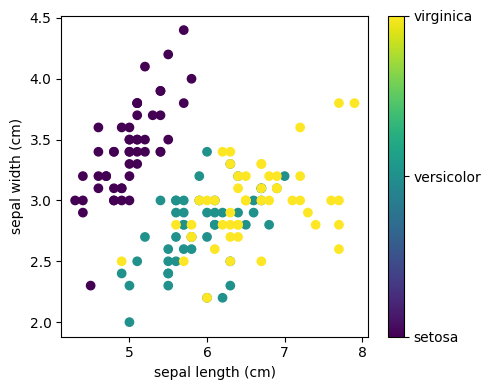

In [75]:
# Ciężko jest analizować surowe dane w formie tabeli, dlatego dobrym pomysłem
# jest zwizualizowanie danych (visual data exploration)

# Użyjemy tutaj wykresu punktowego (scatterplot), ale dodatkowo punkty (obserwacje)
# zostaną pokolorwane wg klasy do której należą. 

# Poniższy formatter wybierze dla klas 0, 1, 2 odpowiednią nazwę etykiety
# z tablicy etykiet iris.target_names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

# ponieważ nasz zbiór zawiera 4 zmienne niezależne (features), 
# a wykres może pokazać tylko 2 wymiary, musimy coś wybrać na początek :)
# 
plt.figure(figsize=(5, 4))
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["Target"])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.tight_layout()
plt.show()

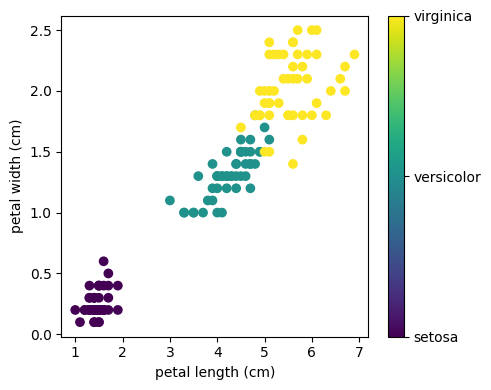

In [76]:
plt.figure(figsize=(5, 4))
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], c=df["Target"])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.tight_layout()
plt.show()

In [77]:
# mozemy dla ułatwienia narysować wszytskie wykresy zależności między zmiennymi niezależnymi

 

In [78]:
# funckja "corr()" wywolana na ramce danych pozwala na obliczenie korelacji
# między kolumnami (każda z każdą)
# w tym wypadku pomijamy kolumne z etykietami

columns = iris.feature_names[0:4] 
df[columns].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


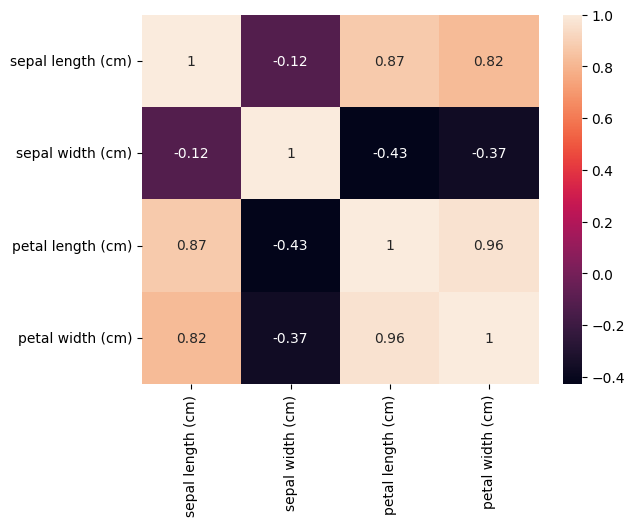

In [79]:
# Bardzo wygodnym sposobem wizualizacji zależności między kolumnami
# jest użycie korelacji w połączeniu z tzw. "mapą cieplną"
import seaborn as sns
sns.heatmap(df[columns].corr(), annot = True);

In [80]:
# Teraz przystępujemy do klasyfikacji. Naszym celem jest stworzenie modelu
# który będzie klasyfikował kwiat do jednej z 3 klasy na podstawie zmierzonych cech

# Najpierw podzielimy naszą ramkę danych na 2 oddzielne ramki:
# - zmienne niezależne 
# - zmienną zależną (klasę)

X = df.copy()
y = X.pop("Target")


In [81]:
# dzielimy cały zbiór na zbiór treningowy i zbiór testowy 
# X_train & X_test - zmienne niezależne (zbior uczący, zbiór testowy)
# y_train & y_test - etykiety klas (zbior uczący, zbiór testowy)

# parametry funkcji "train_test_split()":
# - test_size - okresla jaka część całego zbioru zostanie "odłożona" jako zbiór testowy
# - random_state - funkcja "train_test_split" zawsze wymiesza dane przed podziałem zbioru,
#         jesli przekazemy parametr random_state to wymieszanie będzie zawsze takie samo
#         tj. uruchamiając tą funkcję wiele razy z tym samym parametrem, otrzymamy zawsze taki
#         sam podział.
# - stratify - zachowaj proporcje klas przy podziale. argumentem jest tablica (wektor) etykiet

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [82]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
21,5.1,3.7,1.5,0.4
47,4.6,3.2,1.4,0.2
141,6.9,3.1,5.1,2.3
90,5.5,2.6,4.4,1.2
64,5.6,2.9,3.6,1.3
...,...,...,...,...
41,4.5,2.3,1.3,0.3
93,5.0,2.3,3.3,1.0
26,5.0,3.4,1.6,0.4
3,4.6,3.1,1.5,0.2


In [83]:
# do trenowania wybierzemy sobie tylko pierwsze 2 zmienne i spróbujemy zwizualizować rezultat

features = iris.feature_names[0:2]

features

['sepal length (cm)', 'sepal width (cm)']

In [84]:
# trenowanie modelu regresji logistycznej
from sklearn.linear_model import LogisticRegression

# przygotowanie parametrów modelu
model = LogisticRegression(C=100.0, solver='lbfgs', max_iter=100, multi_class='ovr')

# właściwy trening (parametrami jest zbiór uczący)
model.fit(X_train[features].values, y_train)

# mały komentarz: nie musimy uzywac zapisu "X_train[features].values", możemy
# normalnie uzyc jako parametru ramki danych: "X_train[features]"
# uzycie .values zwróci nam tablice (array). Tutaj zastosowałem .values
# aby oszczędzić komunikatu (warning) z funkcji pomocniczej.




LogisticRegression(C=100.0, multi_class='ovr')

In [85]:
type(X_train[features].values)

numpy.ndarray

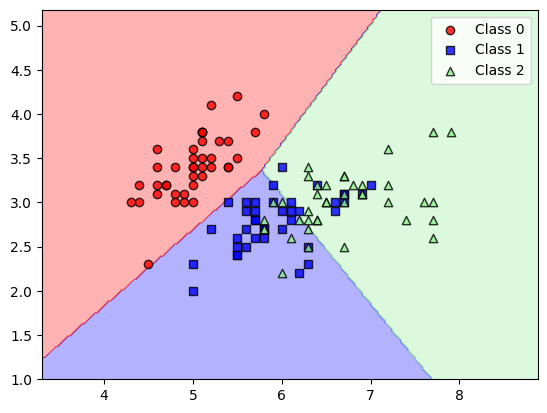

In [86]:
# uzyjemy naszje funkcji pomocniczej, aby zwizualizować regiony decyzyjne klasyfikatora.

plot_decision_regions(X_train[features].values, y_train.values, classifier=model)

In [87]:
# ewaluacja (używamy odłożonego zbioru testowego)
model.score(X_test[features].values, y_test)

0.7666666666666667

In [88]:
# widzimy, ze klasyfikacja tylko na podstawie zmiennych określających rozmiar kielicha
# daje nam dokładność w okolicach 76%

In [89]:
y_test.shape

(30,)

In [90]:
# Teraz weźmy kolejne 2 zmienne: rozmiar płatków

features = iris.feature_names[2:4]

features

['petal length (cm)', 'petal width (cm)']

In [91]:
# trenujemy nasz model
model = LogisticRegression(C=100, solver='lbfgs', max_iter=100, multi_class='ovr')
model.fit(X_train[features].values, y_train)


LogisticRegression(C=100, multi_class='ovr')

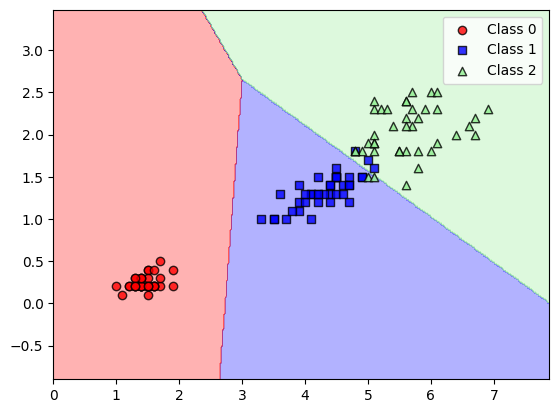

In [92]:
plot_decision_regions(X_train[features].values, y_train.values, classifier=model)

In [93]:
model.score(X_test[features].values, y_test)

0.9666666666666667

In [94]:
# teraz lepiej, osiągamy ~97% dokładności

In [95]:
# trenowanie modelu regresji logistycznej na wszytskich zmiennych

# przygotowanie parametrów modelu
model = LogisticRegression(C=100.0, solver='lbfgs', max_iter=100, multi_class='ovr')

# właściwy trening (parametrami jest zbior uczący)
model.fit(X_train, y_train)

# ewaluacja (używamy odłożonego zbioru testowego)
model.score(X_test, y_test)

# model.score zwraca metrykę dokładności modelu (accuracy)

0.9666666666666667

In [96]:
# spróbójmy teraz przeprowadzić "sprawdzian krzyżowy" (crossvalidation)
from sklearn.model_selection import cross_val_score

# model = LogisticRegression(C=100.0, solver='lbfgs', max_iter=100, multi_class='ovr')

# funkcja "cross_val_score()" zajmie się juz podzialem zbioru na czescuczącą i testową
# i przeprowadzi automatycznie sprawdzian krzyzowy. Parametr "cv" oznacza ilość walidacji

# funkcja ta będzie zatem trenowała model 10 razy, za kazdym razem wybierając inną
# część zbioru. Na koniec funkcja zwróci wartośc dla wybranej metryki walidacji 
# (domyslnie - accuracy, parametr "scoring" pozwala wybrać inne np. "f1_weighted") 

scores = cross_val_score(model, X, y, cv=10)

scores


array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [97]:
print(np.mean(scores))

0.9666666666666668


In [98]:
# użyjmy naszego modelu aby przewidzieć klasy dla zbioru testowego:
predictions = model.predict(X_test) 

# otrzymane wyniki (w zmiennej "predictions" - predicted labels) 
# porównamy  z wynikami zbioru testowego (true labels)

# Stworzymy nową ramkę danych z kolumnami "actual" i "predicted"
# (zwróćmy uwagę jak można stworzyć ramkę danych z 2 jednowymioarowych tablic (wektorów))

compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


In [99]:
# Biblioteka scikit learn, moduł "metrics" posiada funkcję obliczania macierzy błędów: "confusion_matrix()"
# Funkcja przyjmuje 2 parametry:
# - tablicę (wektor) rzeczywistych klas (ze zbioru testowego)
# - tablicę (wektor) klas przewidzianych

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predictions)

# Wyświetlmy macierz błędów
print("Macierz błędów:\n")
print(cf)

# stworzenie ramki danych z macierzy błędów, wraz z opisem kolumn (columns) i wierszy (index)
pd.DataFrame(
    cf,
    index=iris.target_names, 
    columns=iris.target_names)

Macierz błędów:

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,10,0
virginica,0,1,9


In [100]:
# Kolejną użyteczną funkcją jest obliczanie podstawowych metryk
# na podstawie macierzy błędów
from sklearn.metrics import classification_report

cr = classification_report(y_test, predictions, target_names = iris.target_names)

print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

